In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [ ]:
! pip install split-folders --quiet

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/data/images", output="/content/drive/MyDrive/data/ouputim",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values


Copying files: 3885 files [03:31, 18.41 files/s]


In [ ]:
df_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data/ouputim/train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 3107 files belonging to 2 classes.


In [ ]:
len(df_train)

98

In [ ]:
98*32

3136

In [ ]:
classes = df_train.class_names
classes

['Female', 'Male']

In [ ]:
for image, label in df_train.take(1):
  print(image.numpy())
  print(label.numpy())

[[[[  1.25   4.     2.5 ]
   [  0.5    2.     0.  ]
   [  0.     1.25   0.  ]
   ...
   [  0.     2.     0.25]
   [  1.     3.     1.5 ]
   [  3.     4.     3.5 ]]

  [[  0.     1.5    1.  ]
   [  0.25   1.75   0.5 ]
   [  0.     1.75   0.5 ]
   ...
   [  0.     1.75   0.5 ]
   [  0.     1.25   0.25]
   [  0.25   1.     0.25]]

  [[  0.     2.     0.75]
   [  0.     1.5    0.  ]
   [  0.     2.     0.25]
   ...
   [  0.5    2.5    0.  ]
   [  0.5    1.75   0.25]
   [  0.     1.75   0.75]]

  ...

  [[229.   220.   209.  ]
   [232.   223.5  211.25]
   [230.75 223.   212.25]
   ...
   [  1.     2.5    1.  ]
   [  0.     1.25   0.  ]
   [  0.5    2.5    0.75]]

  [[228.75 217.75 206.75]
   [233.   224.   211.5 ]
   [231.25 223.25 210.75]
   ...
   [  0.     1.25   0.25]
   [  0.     1.     0.  ]
   [  2.     2.5    2.25]]

  [[223.25 211.75 199.  ]
   [226.   216.75 207.  ]
   [232.75 222.75 213.  ]
   ...
   [  0.     0.75   1.25]
   [  0.     1.     0.75]
   [  0.5    1.75   3.  ]]]


 

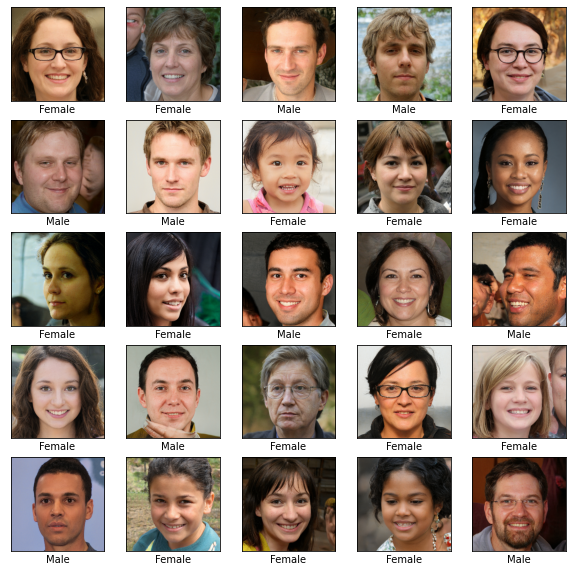

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

In [ ]:
df_vali = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data/ouputim/val',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
  
)

Found 387 files belonging to 2 classes.


In [ ]:
df_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data/ouputim/test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,)

Found 391 files belonging to 2 classes.


In [ ]:
df_train = df_train.cache().shuffle(1000)
df_test = df_test.cache().shuffle(1000)
df_vali = df_vali.cache().shuffle(1000)

In [ ]:
data_preprocessing = tf.keras.Sequential([
                                layers.experimental.preprocessing.Resizing(256,256),
                                layers.experimental.preprocessing.Rescaling(1.0/256),
                                layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2)
                    ])

In [ ]:
model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(32, 256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(9, activation = 'softmax'),
    
])


model.build(input_shape=(32, 256, 256, 3))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (32, 84, 84, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (32, 82, 82, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (32, 27, 27, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (32, 25, 25, 64)         

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(df_train, epochs= 50, batch_size = 32,
                    validation_data= df_vali)

Epoch 1/50
98/98 [==============================] - 87s 136ms/step - loss: 0.7443 - accuracy: 0.5134 - val_loss: 0.6909 - val_accuracy: 0.5814
Epoch 2/50
98/98 [==============================] - 5s 48ms/step - loss: 0.6654 - accuracy: 0.6012 - val_loss: 0.6398 - val_accuracy: 0.6021
Epoch 3/50
98/98 [==============================] - 5s 48ms/step - loss: 0.6106 - accuracy: 0.6752 - val_loss: 0.5278 - val_accuracy: 0.7519
Epoch 4/50
98/98 [==============================] - 5s 48ms/step - loss: 0.5676 - accuracy: 0.7103 - val_loss: 0.4953 - val_accuracy: 0.7778
Epoch 5/50
98/98 [==============================] - 5s 48ms/step - loss: 0.5274 - accuracy: 0.7361 - val_loss: 0.4741 - val_accuracy: 0.7804
Epoch 6/50
98/98 [==============================] - 5s 47ms/step - loss: 0.5260 - accuracy: 0.7319 - val_loss: 0.4620 - val_accuracy: 0.7984
Epoch 7/50
98/98 [==============================] - 5s 47ms/step - loss: 0.4936 - accuracy: 0.7647 - val_loss: 0.4504 - val_accuracy: 0.8140
Epoch 8/50


In [ ]:
model.evaluate(df_test)

13/13 [==============================] - 0s 25ms/step - loss: 0.3450 - accuracy: 0.8645


[0.34504809975624084, 0.8644501566886902]

In [ ]:
train_accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0, 0.5, 'Loss')

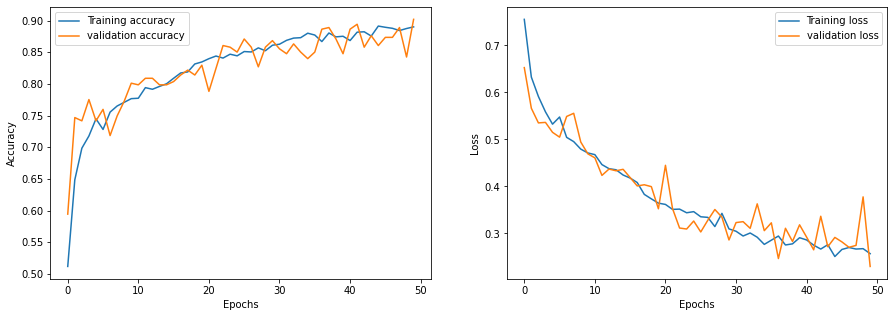

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(50),train_accu,label= 'Training accuracy')
plt.plot(range(50),val_accu,label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),train_loss,label= 'Training loss')
plt.plot(range(50),val_loss,label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

actual label Female
predicted_label Female


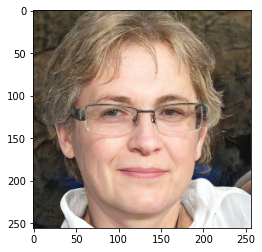

In [ ]:
for image, label in df_test.take(1):
  plt.imshow(image[0].numpy().astype('int'))
  print('actual label', classes[label[0]])

  prediction = model.predict(image)
  print('predicted_label',classes[np.argmax(prediction[0])] )